### Convolution of an Image with Mean Filter

There will have three simulaiton scenario here:

    Scenario   Mean  StdDev   Filter_1   Filter_2    Filter_3
    ---------------------------------------------------------
     01          0     8          3X3       5X5         7X7
     02          0     13         3X3       5X5         7X7
     03          0     100        3X3       5X5         7X7
    ---------------------------------------------------------
    Add White Noise to an Image and then reduce it using convolution filter h, with different filter shape i.e.
    3X3,5X5,7X7

In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import scipy.signal

In [5]:
def img_reader(img_input): #this image_input will be in .jpg format
    img=cv2.imread(img_input) 
    return img #this will return a 3D image

In [6]:
def img_2_gray_converter(img):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return gray #this will return a 2D image

In [7]:
def show_img(img,custom_cmap="gray"):
    plt.imshow(img,cmap=custom_cmap)

In [8]:
def set_hyper_parameters(img,scenario=1): #this img is the colored image, having 3 Dimensions.
    mean=0
    std_div=8
    row,col=img.shape[0],img.shape[1]
    if scenario==2:
        std_div=13
    elif scenario==3:
        std_div=100
    return mean,std_div,row,col

In [9]:
def create_guass_white_noise(mean,std_div,row,col):
    # guassian filter will create an output image that would be a blurred version of an input image
    gauss_white_noise=np.random.normal(mean,std_div,(row,col))
    gauss_white_noise=gauss_white_noise.reshape(row,col)
    
    #the histogram of the data
    '''n,bins,patches=plt.hist(gauss,50,density=True,facecolor="g",alpha=0.75,histtype="step") #_ means dummy variable
    #plt.figure(3)
    plt.xlabel("Guass Value")
    plt.ylabel("Probability")
    plt.title("White Noise")
    plt.text(60,0.025,r"$\mu={},\ \sigma={}$".format(mean,std_div)) #matplotlib.pyplot.text(x, y, s, fontdict=None, withdash=False, **kwargs)
    #plt.axis([40,160,0,0.07]) #xmin, xmax, ymin, ymax
    plt.grid(True)
    plt.show()'''
    return gauss_white_noise

In [10]:
def show_original_image_hist(mean,std_div,img_input):
    img=img_reader(img_input)
    img=img.reshape(img.shape[0],-1)
    n,bins,patches=plt.hist(img,50,density=True,facecolor="g",alpha=0.75,histtype="step") #_ means dummy variable
    plt.xlabel("Original Image Value")
    plt.ylabel("Probability")
    plt.title("Original Image")
    plt.text(60,0.025,r"$\mu={},\ \sigma={}$".format(mean,std_div)) #matplotlib.pyplot.text(x, y, s, fontdict=None, withdash=False, **kwargs)
    #plt.axis([40,160,0,0.07]) #xmin, xmax, ymin, ymax
    plt.grid(True)
    #plt.show()
    print("Image Shape (After reshaping):{}".format(img.shape))

In [11]:
def mean_filter(filter_mode): #filter_h should be of 2-Dimension, 3X3 averaging kernel often used in mean filtering
    #although larger kernels (e.g. 5X5 squares) can be used for more severe smoothing.
    # Note that, a small kernel can be applied more than once in order to produce a similar but not identical effect as a sigle 
    #pass with a large kernel.
    data=np.ones(filter_mode**2)
    filter_h=data.reshape(filter_mode,filter_mode)/float(filter_mode**2)
    #filter_h=data.reshape(filter_mode,filter_mode)
    return filter_h

In [12]:
mean_filter(7)

array([[0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816]])

In [13]:
def print_msg():
    print("After applying the Mean Filter:\n-----------------------------")
    print("\t The new image has fewer high-frequency components and thus is relatively less\
    sharp then the image before convolution, but the filter has done a good job of reducing the white noise")
    

In [14]:
print_msg()

After applying the Mean Filter:
-----------------------------
	 The new image has fewer high-frequency components and thus is relatively less    sharp then the image before convolution, but the filter has done a good job of reducing the white noise


In [15]:
def mainSimulation():
    img_input=img_reader("test.jpg") #colored Image

    mean,std_div,row,col=set_hyper_parameters(img_input,scenario=1)
    gray_img=img_2_gray_converter(img_input)
    gauss_white_noise=create_guass_white_noise(mean,std_div,row,col)
    gray_img_noisy=gray_img+gauss_white_noise
    
    filter_mode=int(input("Enter the Filter Mode (3/5/7...):"))
    print("Filter Mode {} has been choosen which is less then shape:({}/{})".\
          format(filter_mode,img_input.shape[0],img_input.shape[1]))
    filter_h=mean_filter(filter_mode) # return a 3X3 filter_h kernel
    print("Filter_h:\n{}".format(filter_h))
    
    
    choice=int(input("Enter Your Operation Mode: \n1.Single Step Filtering\n2.Multiple Steps (03) Filtering\n"))
    if choice==1:
        gray_img_after_noise_filtering_1=scipy.signal.convolve2d(gray_img_noisy,filter_h,mode="same")
    elif choice==2:
        # Here apply multiple filtering...i.e. three small filter instead of one large filter
        gray_img_after_noise_filtering_1=scipy.signal.convolve2d(gray_img_noisy,filter_h,mode="same")
        gray_img_after_noise_filtering_2=scipy.signal.convolve2d(gray_img_after_noise_filtering_1,filter_h,mode="same")
        gray_img_after_noise_filtering_3=scipy.signal.convolve2d(gray_img_after_noise_filtering_2,filter_h,mode="same")
    #--------------------------------------------------------------------------------------------------------------

    plt.figure(1,figsize=(10,10))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Original BGR Image")
    plt.imshow(img_input)
    
    plt.figure(2,figsize=(10,10))
    #plt.subplot(211)
    plt.title('Gray Image (Before Noise)')
    plt.grid(True)
    plt.imshow(gray_img,cmap="gray")
    
    plt.figure(3,figsize=(10,10))
    #plt.subplot(212)
    plt.title('Gray Image (After Noise)')
    plt.grid(True)
    plt.imshow(gray_img_noisy,cmap="gray")
    
    if choice==1:
        plt.figure(4,figsize=(15,15))
        plt.subplot(121)
        plt.title('Gray Image (After Noise)')
        plt.grid(True)
        plt.imshow(gray_img_noisy,cmap="gray")

        plt.subplot(122)
        plt.title("Gray Image (After Filtering Noise)")
        plt.grid(True)
        plt.imshow(gray_img_after_noise_filtering_1,cmap="gray")
        
    elif choice==2:
        plt.figure(4,figsize=(20,20))
        plt.subplot(221)
        plt.title('Gray Image (After Noise)')
        plt.grid(True)
        plt.imshow(gray_img_noisy,cmap="gray")

        plt.subplot(222)
        plt.title("Gray Image (After (1st) Filtering Noise)")
        plt.grid(True)
        plt.imshow(gray_img_after_noise_filtering_1,cmap="gray")

        plt.subplot(223)
        plt.title("Gray Image (After (2nd) Filtering Noise)")
        plt.grid(True)
        plt.imshow(gray_img_after_noise_filtering_2,cmap="gray")

        plt.subplot(224)
        plt.title("Gray Image (After (3rd) Filtering Noise)")
        plt.grid(True)
        plt.imshow(gray_img_after_noise_filtering_3,cmap="gray")
    
    print_msg()
    
    

Enter the Filter Mode (3/5/7...):5
Filter Mode 5 has been choosen which is less then shape:(339/512)
Filter_h:
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
Enter Your Operation Mode: 
1.Single Step Filtering
2.Multiple Steps (03) Filtering
1
After applying the Mean Filter:
-----------------------------
	 The new image has fewer high-frequency components and thus is relatively less    sharp then the image before convolution, but the filter has done a good job of reducing the white noise


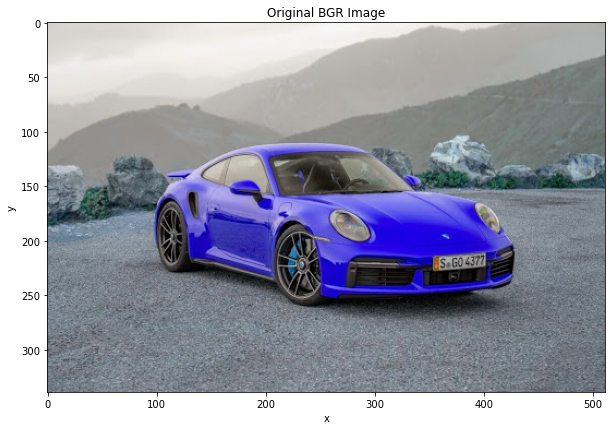

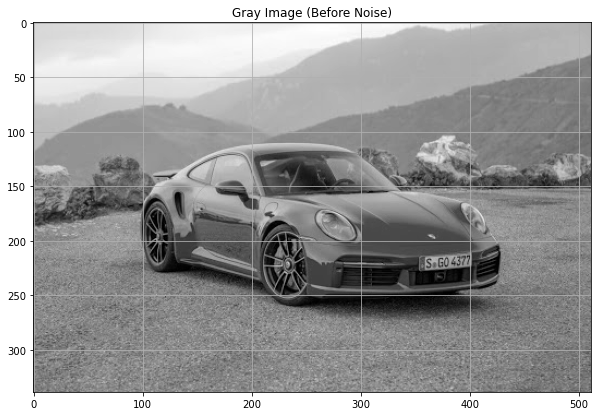

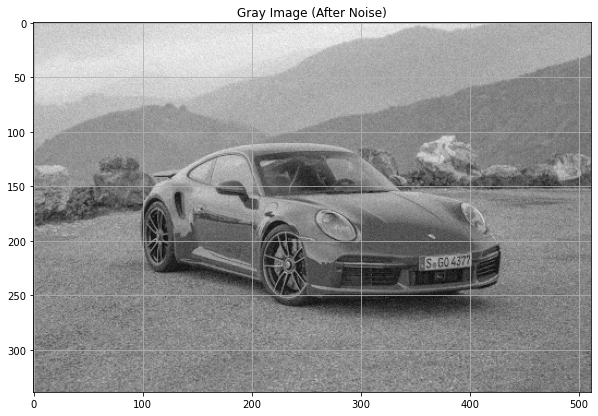

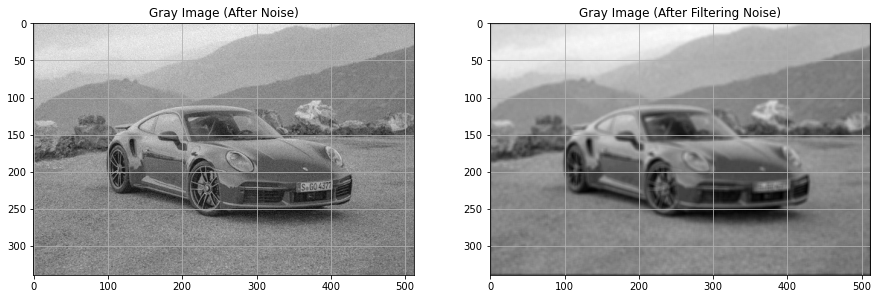

In [16]:
mainSimulation()

In [17]:
x=np.ones(10)
x=x.reshape(2,5)

In [18]:
x/float(9)

array([[0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111]])